In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 8s 2us/step


In [4]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [9]:
model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs = 100, verbose = 1)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4852 - accuracy: 0.8271
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3646 - accuracy: 0.8678
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3275 - accuracy: 0.8806
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3022 - accuracy: 0.8899
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2846 - accuracy: 0.8942
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8992
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9026
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2462 - accuracy: 0.9068
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2348 - accuracy: 0.9114
Epoch 10/100
1875/1875 [==============================] - 3s 2ms/step - l

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0549 - accuracy: 0.9798
Epoch 80/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9794
Epoch 81/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9804
Epoch 82/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9805
Epoch 83/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9803
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9807
Epoch 85/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0503 - accuracy: 0.9813
Epoch 86/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9811
Epoch 87/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9819
Epoch 88/100
1875/1875 [==============================] - 6s 3ms/step - loss:

In [18]:
model.save("clothing_model.h5")
print("Saved Model to Disk")

Saved Model to Disk


In [19]:
model = load_model("clothing_model.h5")
y_hat = model.predict(test_images)

In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.8466 - accuracy: 0.8834


[0.8465911149978638, 0.883400022983551]

<IPython.core.display.Javascript object>


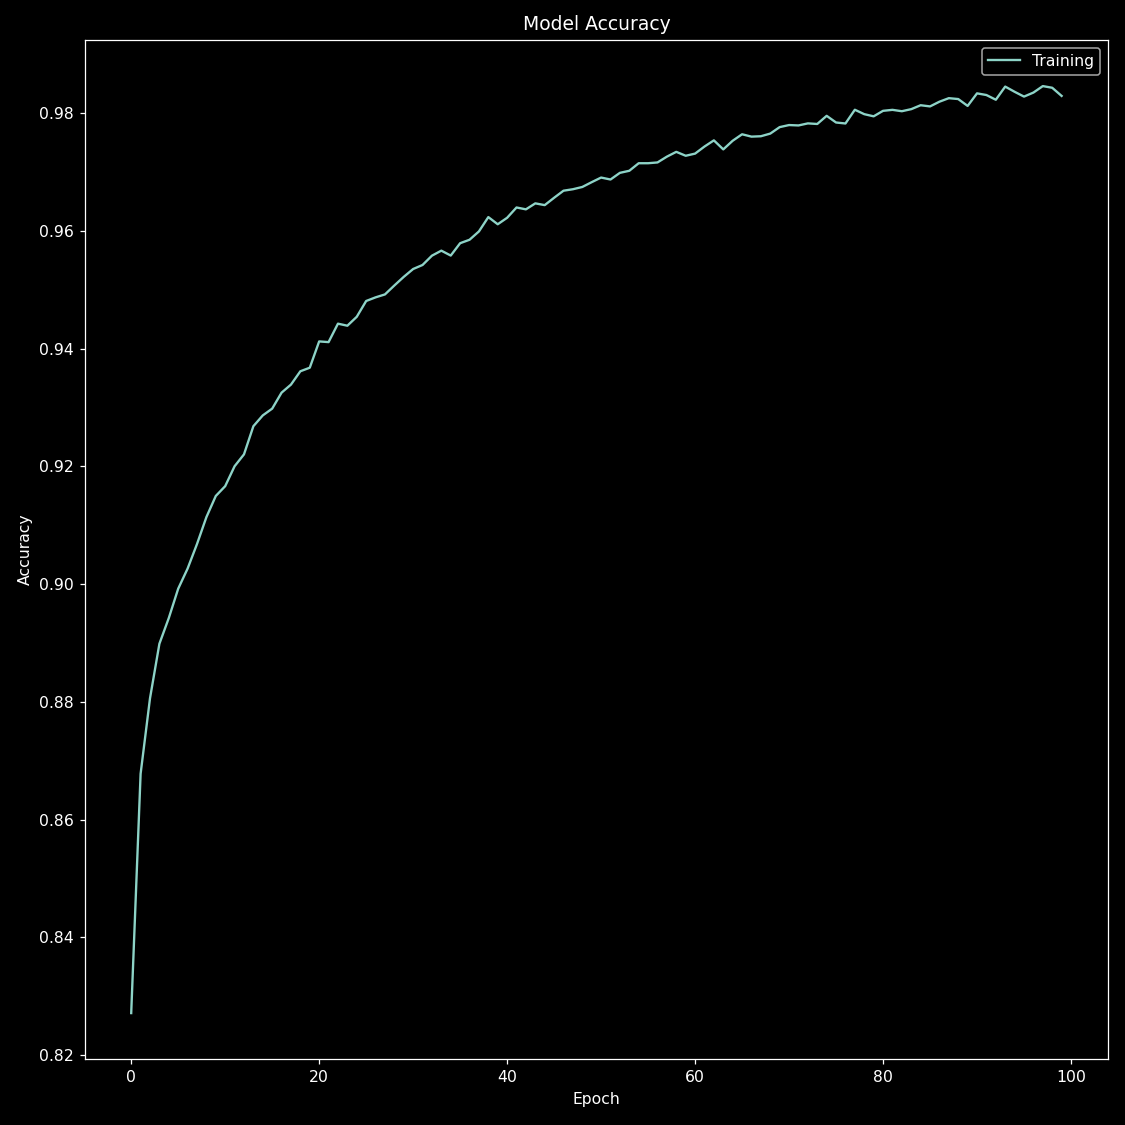

In [33]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


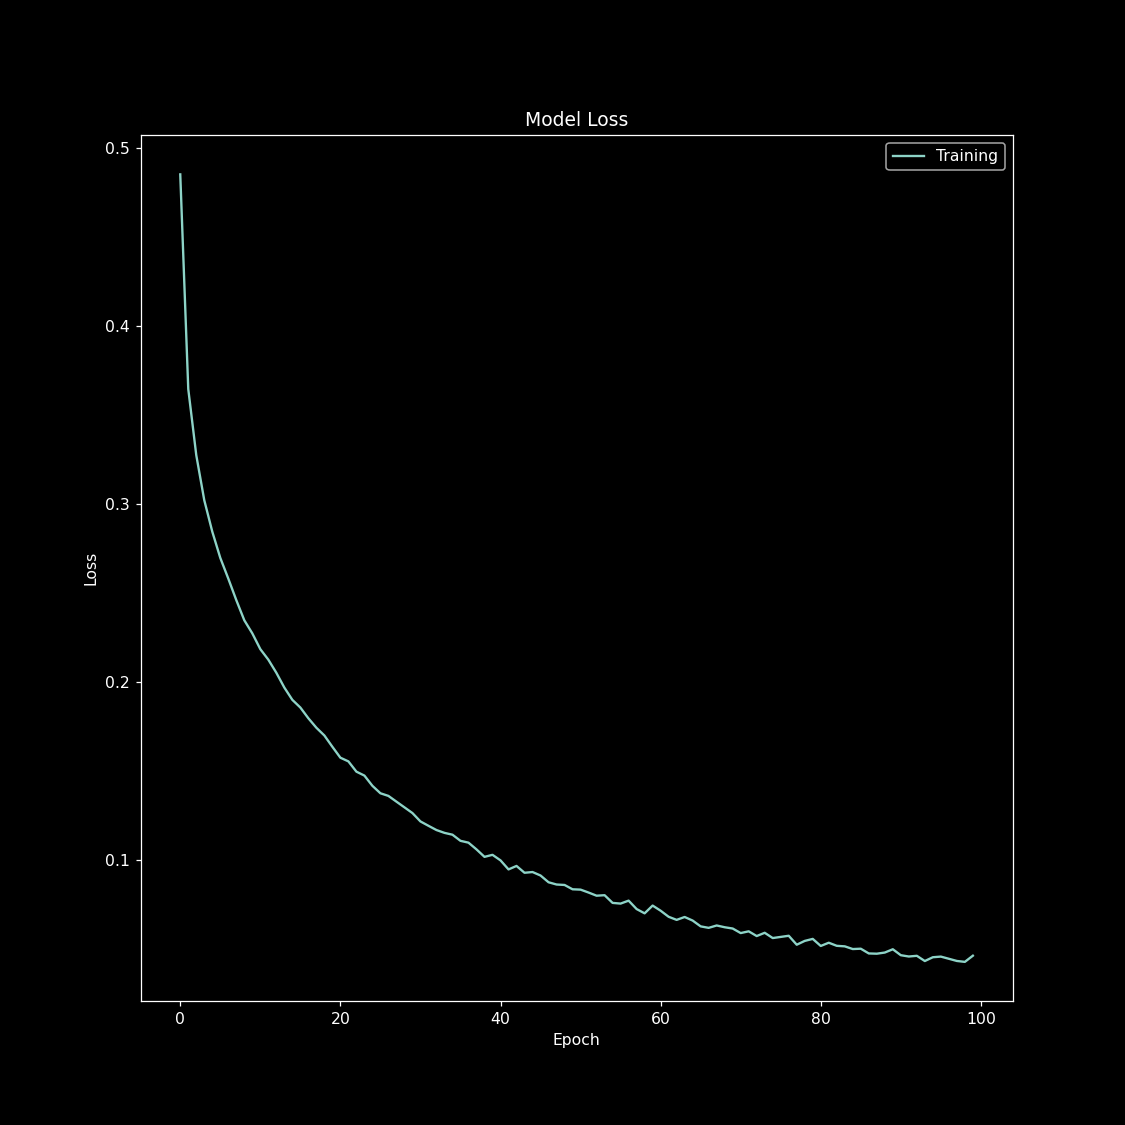

In [34]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.show()